In [96]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
from __future__ import print_function

import datetime
import pandas as pd
import numpy as np
from dateutil import parser as dtparser

from utils.datafetch import *
from utils.vectorized_funs import *
from utils.datapipe import *
from utils.kerasutil import *
from utils import scenarioa
from utils import scenariob
from FintechCapstone import FinCapstone

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [82]:
%matplotlib inline

plt.style.use('seaborn-whitegrid')
date_from = '2009-01-01'
date_to = '2017-03-01'
timespan = {
    "short_term": [1, 5]
    ,"medium_term": [40]
    ,"long_term": [90]
}

#trial = FinCapstone(ticker_list=["GLW","HIMX","GLUU"], scenario="scenarioa", ticker_list_samplesize=4, timespan=timespan, date_from=date_from, reset_status=True)
#trial = FinCapstone(scenario="scenarioa", ticker_list=["ZHNE","BSFT","AERO","MATR","ITMSF","FIT","TIPT","OLBK","QADA","ATTU","LGF","STX","TPCS","GSAT","ZNGA","GLW","HIMX","YHOO", "NWSA","JAKK","GLUU","AMZN", "AAPL", "EBAY", "GOOG", "DIS", "NFLX", "EA", "TWTR", "FB", "TTWO", "PXLW", "UBI"], ticker_list_samplesize=4, timespan=timespan, date_from=date_from, reset_status=True)
trial = FinCapstone(scenario="scenariob",ticker_list_samplesize=4000, timespan=timespan, date_from=date_from, reset_status=False)

#trial.run_initial_dataload()
#trial.feature_engineering()

nasdaq has 3188 tickers.


Final dataset has 3188 records
(OK) Final dataset has 3188 distinct tickers


In [84]:
#trial.run_initial_dataload()

In [85]:
#trial.feature_engineering()

In [86]:
X_train, y_train, X_test, y_test = scenariob.prepare_problemspace(trial.valid_ticker_list(), trial.train_from, trial.train_until, trial.test_from, normalize=True, return_type="numpy")

In [88]:
X_train_pnl.shape

(1510, 29, 33)

In [89]:
y_train_pnl.shape

(1510, 4)

In [90]:
X_test_pnl.shape

(332, 29, 33)

In [91]:
y_test_pnl.shape

(332, 4)

In [92]:
np.isnan(X_train_pnl).sum()

0

In [94]:
np.isnan(y_train_pnl).sum()

0

In [109]:
X_final, pca = scenariob.dim_reduction(X_train, 10)

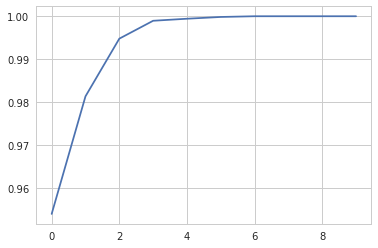

In [110]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [121]:
model = scenariob.create_model(len(trial.valid_ticker_list()), X_final.shape[1])

In [123]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 2, 2, 64)          640       
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          36928     
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 128)         147584    
__________

In [ ]:
model.fit(X_final, y_train, epochs=1, batch_size=16)

Epoch 1/1
 464/1518 [========>.....................] - ETA: 155s - loss: 25.4462